In [141]:
import pandas as pd 
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import datetime
from sklearn.neighbors import KNeighborsClassifier
plt.style.use('seaborn')

#设置需要预测的指数
indexcode = '000016.SH'
#设置历史区间
startdate = '20140101'
enddate = '20190123'
#获取历史区间的交易列表
tradelist = list(get_trade_days(startdate, enddate, count=None).strftime('%Y%m%d'))
#设置数据分类标签
label = ['money rate %','net up rate % ','mean of updown %']#资金流向、涨跌比、平均涨幅

In [142]:
date = '20190123'
nextdate = '20190124'
stock = get_index_stocks(indexcode,date)
df = get_price(stock, date, date, '1d', ['quote_rate'], skip_paused = False, fq = 'pre', bar_count = 0, is_panel = 1)['quote_rate'].T.fillna(0)
label3 = round(df.mean()[0],3)
label2 = (len(list(df[df[date]>0][date]))-len(list(df[df[date]<0][date])))/len(list(df[date]))
moneydf = get_money_flow_step(stock,date,date,'1d',['net_flow_rate'],None,is_panel=1)['net_flow_rate'].T.fillna(0)
label1 = round(moneydf.mean()[0],3)
value = get_price(indexcode, date, nextdate, '1d', ['quote_rate'], skip_paused = False, fq = 'pre', bar_count = 0, is_panel = 1)['quote_rate']
dt = pd.DataFrame([label1,label2,label3],index =label,columns=[date]).T
dt['now up']=list(value)[0]
dt['now label'] = dt['now up'].apply(lambda x:1 if x>0 else -1)
dt['next up']=list(value)[1]
dt['label']=dt['next up'].apply(lambda x:1 if x>0 else -1)
dt

,money rate %,net up rate %,mean of updown %,now up,now label,next up,label
20190123,-4.998,-0.02,-0.088,-0.1742,-1,0.6054,1


In [143]:
dt = pd.DataFrame(columns = label)
for date in tradelist:
    stock = get_index_stocks(indexcode,date)
    df = get_price(stock, date, date, '1d', ['quote_rate'], skip_paused = False, fq = 'pre', bar_count = 0, is_panel = 1)['quote_rate'].T.fillna(0)
    label3 = round(df.mean()[0],3)
    label2 = (len(list(df[df[date]>0][date]))-len(list(df[df[date]<0][date])))/len(list(df[date]))
    moneydf = get_money_flow_step(stock,date,date,'1d',['net_flow_rate'],None,is_panel=1)['net_flow_rate'].T.fillna(0)
    label1 = round(moneydf.mean()[0],3)
    dt.loc[date] = [label1,label2,label3]
value = list(get_price(indexcode, startdate, enddate, '1d', ['quote_rate'], skip_paused = False, fq = 'pre', bar_count = 0, is_panel = 1)['quote_rate'])
dt['now up']=value
dt['now label'] = dt['now up'].apply(lambda x:1 if x>0 else -1)
dt['next up']=list(dt['now up'])[1:]+[0]
dt['label']=dt['next up'].apply(lambda x:1 if x>0 else -1)
dt

,money rate %,net up rate %,mean of updown %,now up,now label,next up,label
20140102,-6.977,-0.44,-0.455,-0.8688,-1,-1.6035,-1
20140103,-14.628,-0.58,-1.197,-1.6035,-1,-1.5062,-1
20140106,-10.977,-0.62,-2.111,-1.5062,-1,-0.1504,-1
20140107,-2.380,-0.32,0.090,-0.1504,-1,0.3097,1
20140108,-4.171,-0.04,-0.175,0.3097,1,-0.7557,-1
20140109,-4.399,-0.62,-0.917,-0.7557,-1,-0.3732,-1
20140110,-8.866,-0.22,-0.622,-0.3732,-1,-0.2439,-1
20140113,-11.486,-0.02,-0.250,-0.2439,-1,0.3126,1
20140114,-7.618,0.32,0.199,0.3126,1,-0.7187,-1
20140115,-12.046,-0.52,-0.620,-0.7187,-1,0.3080,1


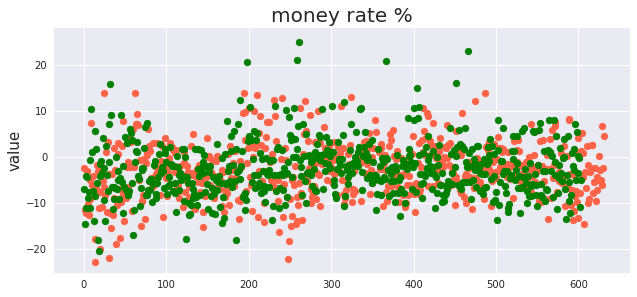

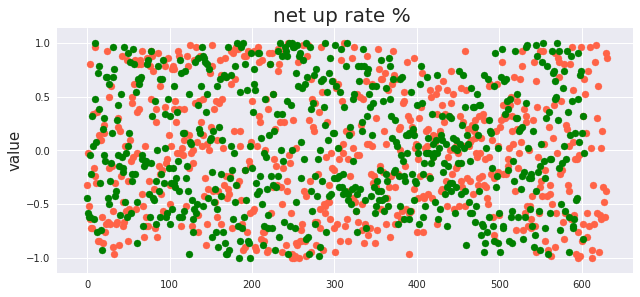

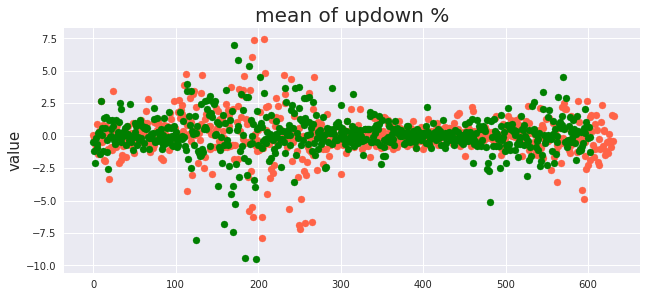

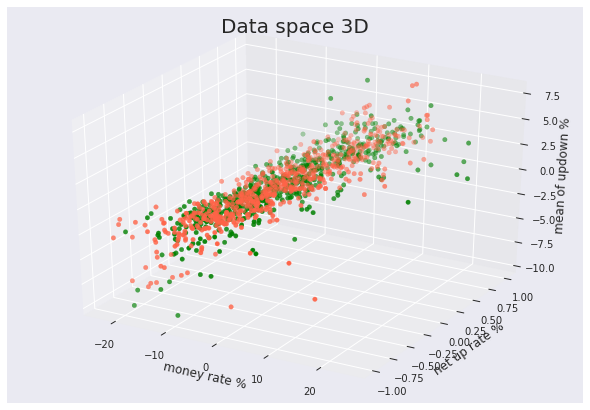

In [206]:
import matplotlib.pyplot as plt
import numpy as np
from mpl_toolkits.mplot3d import Axes3D
updt = dt[dt['label']==1]
downdt = dt[dt['label']==-1]

for l in label:
    fig = plt.figure()
    axes = fig.add_axes([0.1, 0.1, 1, 0.618]) 
    x1_list=list(updt[l])
    y=np.array(x1_list)
    x=np.array(range(0,len(x1_list)))
    axes.scatter(x,y,c='tomato')

    x1_list=list(downdt[l])
    y=np.array(x1_list)
    x=np.array(range(0,len(x1_list)))
    axes.scatter(x,y,c='g')
    axes.set_ylabel('value',fontsize=15)
    axes.set_title(l,fontsize=20)
    
from mpl_toolkits.mplot3d import Axes3D
xsup1 = updt[label[0]]
xsup2 = updt[label[1]]
xsup3 = updt[label[2]]
xsdown1 = downdt[label[0]]
xsdown2 = downdt[label[1]]
xsdown3 = downdt[label[2]]
fig = plt.figure()
ax = Axes3D(fig)
ax.scatter(xsup1,xsup2,xsup3,c='tomato')
ax.scatter(xsdown1,xsdown2,xsdown3,c='g')
ax.set_xlabel(label[0],fontsize=12)
ax.set_ylabel(label[1],fontsize=12)
ax.set_zlabel(label[2],fontsize=12)
ax.set_title('Data space 3D',fontsize=20)
plt.show()




In [166]:
label = ['money rate %','net up rate % ','mean of updown %']
label1 = 'money rate %'
label2 = 'net up rate % '
label3 = 'mean of updown %'

#保留近一年的数据，用于测试，之前数据用于训练
train = dt[:-250]
test = dt[-250:]
X=train[label]
Y=train['label']
X_test=test[label]
Y_test=test['label']

from sklearn.neighbors import KNeighborsClassifier
model=KNeighborsClassifier(n_neighbors=30)

model.fit(X, Y)
print('训练时,预测成功率 {}'.format(round(np.mean(model.predict(X)==Y),2)))
print('测试时,预测成功率 {}'.format(round(np.mean(model.predict(X_test)==Y_test),2)))

训练时,预测成功率 0.56
测试时,预测成功率 0.55


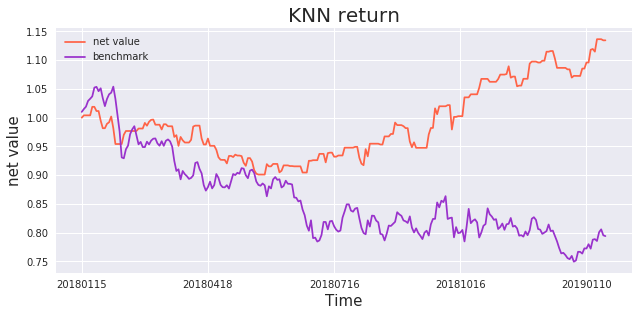

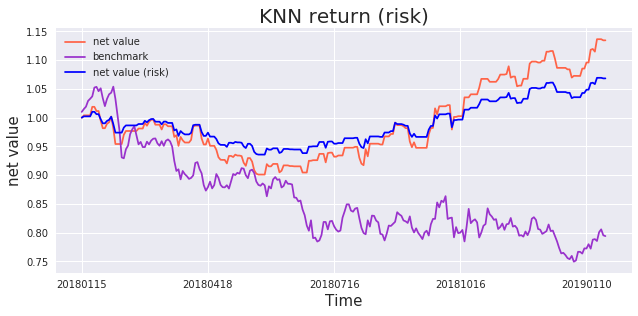

In [207]:
#净值
test['Forecast'] = list(model.predict(X_test))
test['ref'] = test['next up'].loc[test['Forecast']==1]
test = test.fillna(0)
test['ref'] = test['ref'].apply(lambda x:1+x/100)
from operator import mul
from functools import reduce
test['date'] = test.index
test['net value'] = test['date'].apply(lambda x:reduce(mul,list(test['ref'])[:list(test['date']).index(x)+1]))

#基准净值
test['benchmark'] = test['now up'].apply(lambda x:1+x/100)
test['benchmark value'] = test['date'].apply(lambda x:reduce(mul,list(test['benchmark'])[:list(test['date']).index(x)+1]))

#风控净值
# model.predict_proba(X_test)[3][1]
test['risk ref'] = test['next up'].loc[test['Forecast']==1]
test = test.fillna(0)
test['rate'] = [model.predict_proba(X_test)[s][1] for s in range(0,len(model.predict_proba(X_test)))]
test['risk ref'] = (test['risk ref']/100)*test['rate']+1
test['net value (risk)'] = test['date'].apply(lambda x:reduce(mul,list(test['risk ref'])[:list(test['date']).index(x)+1]))

fig = plt.figure()
axes = fig.add_axes([0.1, 0.1, 1, 0.618]) #插入面板
color = ['tomato','green','darkorchid','b','y']
x1_list=list(test['net value'])
y=np.array(x1_list)
x=np.array(range(0,len(x1_list)))
axes.plot(x, y, 'tomato')

x1_list=list(test['benchmark value'])
y1=np.array(x1_list)
x1=np.array(range(0,len(x1_list)))
axes.plot(x1, y1, 'darkorchid')

axes.set_xlabel('Time',fontsize=15)
axes.set_ylabel('net value',fontsize=15)
axes.set_title('KNN return',fontsize=20)
axes.legend(['net value','benchmark'])
#设置X轴
mtradelist = list(test['date'])
numlist=[]
for s in list(range(0,len(mtradelist),60)):
    numlist.append(mtradelist[s])
axes.set_xticks(list(range(0,len(mtradelist),60)))
axes.set_xticklabels(numlist, fontsize=10)




#风控
fig = plt.figure()
axes = fig.add_axes([0.1, 0.1, 1, 0.618]) #插入面板
color = ['tomato','green','darkorchid','b','y']
x1_list=list(test['net value'])
y=np.array(x1_list)
x=np.array(range(0,len(x1_list)))
axes.plot(x, y, 'tomato')

x1_list=list(test['benchmark value'])
y1=np.array(x1_list)
x1=np.array(range(0,len(x1_list)))
axes.plot(x1, y1, 'darkorchid')

x1_list=list(test['net value (risk)'])
y2=np.array(x1_list)
x2=np.array(range(0,len(x1_list)))
axes.plot(x2, y2, 'b')

axes.set_xlabel('Time',fontsize=15)
axes.set_ylabel('net value',fontsize=15)
axes.set_title('KNN return (risk)',fontsize=20)
axes.legend(['net value','benchmark','net value (risk)'])
#设置X轴
mtradelist = list(test['date'])
numlist=[]
for s in list(range(0,len(mtradelist),60)):
    numlist.append(mtradelist[s])
axes.set_xticks(list(range(0,len(mtradelist),60)))
axes.set_xticklabels(numlist, fontsize=10)

# 大乱斗

In [208]:
dt = pd.DataFrame(columns = label)
for date in tradelist:
    stock = get_index_stocks(indexcode,date)
    df = get_price(stock, date, date, '1d', ['quote_rate'], skip_paused = False, fq = 'pre', bar_count = 0, is_panel = 1)['quote_rate'].T.fillna(0)
    label3 = round(df.mean()[0],3)
    label2 = (len(list(df[df[date]>0][date]))-len(list(df[df[date]<0][date])))/len(list(df[date]))
    moneydf = get_money_flow_step(stock,date,date,'1d',['net_flow_rate'],None,is_panel=1)['net_flow_rate'].T.fillna(0)
    label1 = round(moneydf.mean()[0],3)
    dt.loc[date] = [label1,label2,label3]
value = list(get_price(indexcode, startdate, enddate, '1d', ['quote_rate'], skip_paused = False, fq = 'pre', bar_count = 0, is_panel = 1)['quote_rate'])
dt['now up']=value
dt['now label'] = dt['now up'].apply(lambda x:1 if x>0 else -1)
dt['next up']=list(dt['now up'])[1:]+[0]
dt['label']=dt['next up'].apply(lambda x:1 if x>0 else -1)
dt

,money rate %,net up rate %,mean of updown %,now up,now label,next up,label
20140102,-6.977,-0.44,-0.455,-0.8688,-1,-1.6035,-1
20140103,-14.628,-0.58,-1.197,-1.6035,-1,-1.5062,-1
20140106,-10.977,-0.62,-2.111,-1.5062,-1,-0.1504,-1
20140107,-2.380,-0.32,0.090,-0.1504,-1,0.3097,1
20140108,-4.171,-0.04,-0.175,0.3097,1,-0.7557,-1
20140109,-4.399,-0.62,-0.917,-0.7557,-1,-0.3732,-1
20140110,-8.866,-0.22,-0.622,-0.3732,-1,-0.2439,-1
20140113,-11.486,-0.02,-0.250,-0.2439,-1,0.3126,1
20140114,-7.618,0.32,0.199,0.3126,1,-0.7187,-1
20140115,-12.046,-0.52,-0.620,-0.7187,-1,0.3080,1


KNN

In [256]:
label = ['money rate %','net up rate % ','mean of updown %']
label1 = 'money rate %'
label2 = 'net up rate % '
label3 = 'mean of updown %'

#保留近一年的数据，用于测试，之前数据用于训练
train = dt[:-250]
test = dt[-250:]
X=train[label]
Y=train['label']
X_test=test[label]
Y_test=test['label']

from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn import tree
from sklearn import svm
from sklearn.naive_bayes import GaussianNB
from sklearn.cluster import KMeans
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
from xgboost import XGBClassifier
dr = pd.DataFrame()
for s in ['tree','KNN','SVM','XGBClass','GBM', 'Random Forest','KMeans','GaussianNB','Logistic']:
    if s == 'tree':
        model = tree.DecisionTreeClassifier() 
    elif s == 'KNN':
        model=KNeighborsClassifier(n_neighbors=30)
    elif s == 'SVM':
        model = svm.SVC() 
    elif s == 'XGBClass':
        model=XGBClassifier()
    elif s == 'GBM':
        model= GradientBoostingClassifier()
    elif s == 'Random Forest':
        model= RandomForestClassifier()
    elif s == 'KMeans':
        model = KMeans()
    elif s == 'GaussianNB':
        model= GaussianNB()
    elif s == 'Logistic':
        model = LogisticRegression()


    model.fit(X, Y)
    print('训练时,预测成功率 {}'.format(round(np.mean(model.predict(X)==Y),2)))
    print('测试时,预测成功率 {}'.format(round(np.mean(model.predict(X_test)==Y_test),2)))

    name = str(s)+' net value'
    #净值
    test['Forecast'] = list(model.predict(X_test))
    test['ref'] = test['next up'].loc[test['Forecast']==1]
    test = test.fillna(0)
    test['ref'] = test['ref'].apply(lambda x:1+x/100)
    from operator import mul
    from functools import reduce
    test['date'] = test.index
    test[name] = test['date'].apply(lambda x:reduce(mul,list(test['ref'])[:list(test['date']).index(x)+1]))
    dr[name] = test[name]
dr

训练时,预测成功率 1.0
测试时,预测成功率 0.53
训练时,预测成功率 0.56
测试时,预测成功率 0.55
训练时,预测成功率 0.61
测试时,预测成功率 0.58
训练时,预测成功率 0.72
测试时,预测成功率 0.5
训练时,预测成功率 0.76
测试时,预测成功率 0.51
训练时,预测成功率 0.97
测试时,预测成功率 0.55
训练时,预测成功率 0.1
测试时,预测成功率 0.09
训练时,预测成功率 0.51
测试时,预测成功率 0.5
训练时,预测成功率 0.53
测试时,预测成功率 0.52


,tree net value,KNN net value,SVM net value,XGBClass net value,GBM net value,Random Forest net value,KMeans net value,GaussianNB net value,Logistic net value
20180115,1.004937,1.000000,1.004937,1.000000,1.000000,1.000000,1.000000,1.004937,1.004937
20180116,1.008978,1.004021,1.008978,1.004021,1.004021,1.004021,1.000000,1.004937,1.008978
20180117,1.018939,1.004021,1.018939,1.013934,1.013934,1.013934,1.009873,1.004937,1.008978
20180118,1.022635,1.004021,1.018939,1.017611,1.017611,1.013934,1.009873,1.004937,1.012637
20180119,1.026738,1.004021,1.018939,1.021694,1.021694,1.013934,1.009873,1.004937,1.016700
20180122,1.041883,1.018831,1.018939,1.036765,1.036765,1.028890,1.009873,1.019761,1.031697
20180123,1.043139,1.018831,1.018939,1.036765,1.036765,1.028890,1.009873,1.019761,1.031697
20180124,1.035637,1.011504,1.011611,1.029308,1.029308,1.021490,1.009873,1.019761,1.024277
20180125,1.040662,1.011504,1.016520,1.029308,1.029308,1.021490,1.009873,1.024709,1.029247
20180126,1.023578,0.994899,1.016520,1.012411,1.012411,1.021490,1.009873,1.024709,1.029247


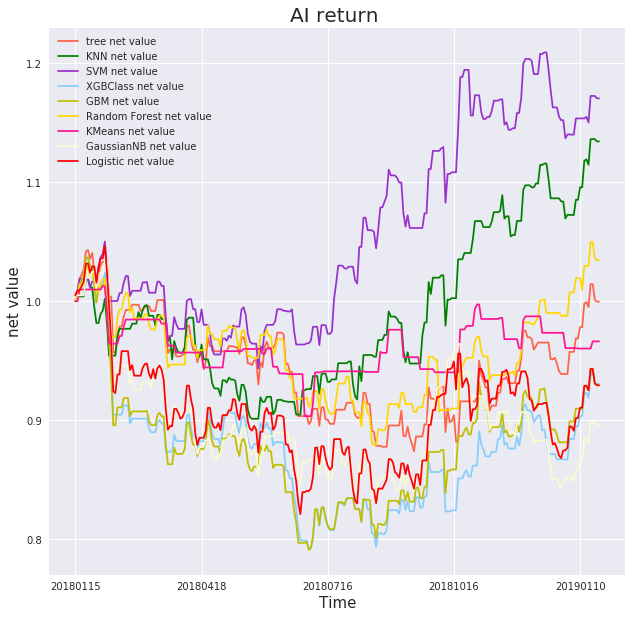

In [257]:
fig = plt.figure()
axes = fig.add_axes([0.1, 0.1, 1, 1.382]) #插入面板
color = ['tomato','green','darkorchid','lightskyblue','y','gold','deeppink','lightgoldenrodyellow','red']
t = list(dr.columns)
for s in t:
    g = t.index(s)
    x1_list=list(dr[s])
    y=np.array(x1_list)
    x=np.array(range(0,len(x1_list)))
    axes.plot(x, y , color = color[g])

    axes.set_xlabel('Time',fontsize=15)
    axes.set_ylabel('net value',fontsize=15)
    axes.set_title('AI return ',fontsize=20)
    axes.legend(t)
    #设置X轴
    mtradelist = list(test['date'])
    numlist=[]
    for s in list(range(0,len(mtradelist),60)):
        numlist.append(mtradelist[s])
    axes.set_xticks(list(range(0,len(mtradelist),60)))
    axes.set_xticklabels(numlist, fontsize=10)